The code uses below Ref
 

1.   https://github.com/joseph10081987/Machine-Learning_new/blob/master/Movie%20Review_DL.ipynb
2.   https://towardsdatascience.com/machine-learning-word-embedding-sentiment-classification-using-keras-b83c28087456



In [105]:
#import libraries
import time
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer
import string

#for training
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
#for word
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.model_selection import cross_val_score
from keras.utils import to_categorical

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
url= 'https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv'
dataset = pd.read_csv(url, sep='\t')

In [107]:
dataset.shape

(156060, 4)

In [108]:
dataset.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [109]:
print(dataset.isnull().values.any())

False


In [110]:
dataset['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [0]:
porter = PorterStemmer()
lancaster=LancasterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
stopwords_en = stopwords.words("english")
punctuations="?:!.,;'\"-()"
#parameters to adjust to see the impact on outcome
remove_stopwords = False
useStemming = False
useLemma = True
removePuncs = True

In [0]:
#Cleaning the reviews
cleanReview=[]
for x in range(0,len(dataset['Phrase'].values)):
    tmpReview=[]
    for w in nltk.word_tokenize(dataset['Phrase'].values[x]):
        newWord = str(w).lower() #Set newWork to be the updated word
        if remove_stopwords and (w in stopwords_en):#if the word is a stopword & we want to remove stopwords
            continue #skip the word and don’t had it to the normalized review
        if removePuncs and (w in punctuations):#if the word is a punc. & we want to remove punctuations
            continue #skip the word and don’t had it to the normalized review
        if useStemming: #if useStemming is set to True
            #Keep one stemmer commented out
            #newWord = porter.stem(newWord) #User porter stemmer
            newWord = lancaster.stem(newWord) #Use Lancaster stemmer
        if useLemma:
            newWord = wordnet_lemmatizer.lemmatize(newWord)
        tmpReview.append(newWord) #Add normalized word to the tmp review
    cleanReview.append(' '.join(tmpReview))

In [113]:
len(cleanReview)

156060

In [0]:
dataset['UpdatedReview']=cleanReview

In [115]:
dataset.head(10)

,PhraseId,SentenceId,Phrase,Sentiment,UpdatedReview
0,1,1,A series of escapades demonstrating the adage ...,1,a series of escapade demonstrating the adage t...
1,2,1,A series of escapades demonstrating the adage ...,2,a series of escapade demonstrating the adage t...
2,3,1,A series,2,a series
3,4,1,A,2,a
4,5,1,series,2,series
5,6,1,of escapades demonstrating the adage that what...,2,of escapade demonstrating the adage that what ...
6,7,1,of,2,of
7,8,1,escapades demonstrating the adage that what is...,2,escapade demonstrating the adage that what is ...
8,9,1,escapades,2,escapade
9,10,1,demonstrating the adage that what is good for ...,2,demonstrating the adage that what is good for ...


In [0]:
#check for empty entries after removing stop mords#
#list(dataset['UpdatedReview']=='').count(True)

In [117]:
#drop empty entries
'''
nan_value = float("NaN")

dataset.replace("", nan_value, inplace=True)

dataset.dropna(subset = ["UpdatedReview"], inplace=True)
'''

'\nnan_value = float("NaN")\n\ndataset.replace("", nan_value, inplace=True)\n\ndataset.dropna(subset = ["UpdatedReview"], inplace=True)\n'

In [118]:
dataset.head(10)

,PhraseId,SentenceId,Phrase,Sentiment,UpdatedReview
0,1,1,A series of escapades demonstrating the adage ...,1,a series of escapade demonstrating the adage t...
1,2,1,A series of escapades demonstrating the adage ...,2,a series of escapade demonstrating the adage t...
2,3,1,A series,2,a series
3,4,1,A,2,a
4,5,1,series,2,series
5,6,1,of escapades demonstrating the adage that what...,2,of escapade demonstrating the adage that what ...
6,7,1,of,2,of
7,8,1,escapades demonstrating the adage that what is...,2,escapade demonstrating the adage that what is ...
8,9,1,escapades,2,escapade
9,10,1,demonstrating the adage that what is good for ...,2,demonstrating the adage that what is good for ...


In [119]:
#shape after dropping empty entires
dataset.shape

(156060, 5)

In [0]:
#drop duplicates
#dataset.drop_duplicates(subset=['UpdatedReview', 'Sentiment'],inplace=True)

In [121]:
#shape after duplicates drop
dataset.shape

(156060, 5)

In [122]:
print(dataset.isnull().values.any())

False


In [123]:
dataset.head(100)

,PhraseId,SentenceId,Phrase,Sentiment,UpdatedReview
0,1,1,A series of escapades demonstrating the adage ...,1,a series of escapade demonstrating the adage t...
1,2,1,A series of escapades demonstrating the adage ...,2,a series of escapade demonstrating the adage t...
2,3,1,A series,2,a series
3,4,1,A,2,a
4,5,1,series,2,series
...,...,...,...,...,...
95,96,3,", I suspect ,",2,i suspect
96,97,3,"I suspect ,",2,i suspect
97,98,3,I suspect,2,i suspect
98,99,3,I,2,i


In [124]:
dataset.shape

(156060, 5)

In [125]:
dataset['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset['UpdatedReview'],dataset['Sentiment'], test_size=0.3, random_state=2003)

In [127]:
#Here, X_train and X_test will have mutually exclusive sets of 109242 and 46818 samples. 
print(X_train.shape)
print(X_test.shape)

(109242,)
(46818,)


In [128]:
Y_train.value_counts()

2    55595
3    23055
1    19203
4     6468
0     4921
Name: Sentiment, dtype: int64

In [129]:
temp_dataset=pd.concat([X_train,Y_train],axis=1)
temp_dataset.head(10)

,UpdatedReview,Sentiment
13718,their age,2
91191,gorgeous epic,4
97160,fan of the gross-out comedy,2
143983,the filmmaker ascends literally to the olympus...,4
37501,twisting mystery,2
44396,including mine -rrb-,2
40166,more enjoyable than it predecessor,3
30005,film that 's flawed and brilliant in equal mea...,3
67570,bask,2
89575,if ever a concept came handed down from the mo...,4


In [130]:
temp_dataset.shape

(109242, 2)

In [0]:
from sklearn.utils import resample
sentiment_0=temp_dataset[temp_dataset['Sentiment']==0]
sentiment_1=temp_dataset[temp_dataset['Sentiment']==1]
sentiment_2=temp_dataset[temp_dataset['Sentiment']==2]
sentiment_3=temp_dataset[temp_dataset['Sentiment']==3]
sentiment_4=temp_dataset[temp_dataset['Sentiment']==4]
'''
sentiment_0_sample=resample(sentiment_0,replace=True,n_samples=21848,random_state=123)
sentiment_1_sample=resample(sentiment_1,replace=True,n_samples=21848,random_state=123)
sentiment_2_sample=resample(sentiment_2,replace=True,n_samples=21848,random_state=123)
sentiment_3_sample=resample(sentiment_3,replace=True,n_samples=21848,random_state=123)
sentiment_4_sample=resample(sentiment_4,replace=True,n_samples=21848,random_state=123)
'''
sentiment_0_sample=resample(sentiment_0,replace=True,n_samples=55000,random_state=123)
sentiment_1_sample=resample(sentiment_1,replace=True,n_samples=55000,random_state=123)
sentiment_2_sample=resample(sentiment_2,replace=True,n_samples=55000,random_state=123)
sentiment_3_sample=resample(sentiment_3,replace=True,n_samples=55000,random_state=123)
sentiment_4_sample=resample(sentiment_4,replace=True,n_samples=55000,random_state=123)


#temp_dataset_upsampled = pd.concat([sentiment_0_sample, sentiment_1_sample,sentiment_2_sample,sentiment_3_sample,sentiment_4_sample])
temp_dataset_upsampled = pd.concat([sentiment_0_sample, sentiment_1_sample,sentiment_2,sentiment_3_sample,sentiment_4_sample])

In [132]:
temp_dataset_upsampled.shape

(275595, 2)

In [133]:
temp_dataset_upsampled.head(10)

,UpdatedReview,Sentiment
98901,the character in swimfan seem motivated by not...,0
2948,then knock yourself out and enjoy the big scre...,0
95435,... a stiff ponderous and charmless a a mechan...,0
8459,is abhorrent to you,0
132031,of his contradictory self-hating self-destruct...,0
17909,run out of steam after a half hour,0
28001,is a case of too many chef fussing over too we...,0
147998,is badly edited often awkwardly directed and s...,0
58445,stuck with a script that prevents them from fi...,0
124780,watching junk like this,0


In [134]:
temp_dataset_upsampled['Sentiment'].value_counts()

2    55595
4    55000
3    55000
1    55000
0    55000
Name: Sentiment, dtype: int64

In [0]:
temp_dataset_upsampled=temp_dataset_upsampled.sample(frac=1)
temp_dataset_upsampled=temp_dataset_upsampled.sample(frac=1)

In [136]:
temp_dataset_upsampled.head(10)

,UpdatedReview,Sentiment
21178,indie tatter and self-conscious seam,1
55462,can i,2
94014,is an agonizing bore except when the fantastic...,0
79612,a character faced with the possibility that he...,0
16828,'s definitely not,2
108639,an engrossing and grim portrait,3
105788,seem to get a coherent rhythm going,3
112304,niftiest,3
25427,the best movie in many a moon about the passio...,4
132810,compelling supporting character,4


In [137]:
temp_dataset_upsampled['Sentiment'].value_counts()

2    55595
4    55000
3    55000
1    55000
0    55000
Name: Sentiment, dtype: int64

In [138]:
'''
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

# Transform each text into a vector of word counts
#vectorizer = CountVectorizer(stop_words="english",ngram_range=(1, 1))
#vectorizer_tfid = TfidfVectorizer(stop_words="english",ngram_range=(1, 1))
vectorizer_tfid = TfidfVectorizer(ngram_range=(1, 2),max_features=3000)

X = vectorizer_tfid.fit_transform(dataset["UpdatedReview"])
Y = dataset['Sentiment']
x_train = vectorizer_tfid.transform(temp_dataset_upsampled['UpdatedReview'])
y_train = temp_dataset_upsampled['Sentiment']
x_test = vectorizer_tfid.transform(X_test)
y_test = Y_test
'''

'\nfrom sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer\n\n# Transform each text into a vector of word counts\n#vectorizer = CountVectorizer(stop_words="english",ngram_range=(1, 1))\n#vectorizer_tfid = TfidfVectorizer(stop_words="english",ngram_range=(1, 1))\nvectorizer_tfid = TfidfVectorizer(ngram_range=(1, 2),max_features=3000)\n\nX = vectorizer_tfid.fit_transform(dataset["UpdatedReview"])\nY = dataset[\'Sentiment\']\nx_train = vectorizer_tfid.transform(temp_dataset_upsampled[\'UpdatedReview\'])\ny_train = temp_dataset_upsampled[\'Sentiment\']\nx_test = vectorizer_tfid.transform(X_test)\ny_test = Y_test\n'

In [0]:
X_P=temp_dataset_upsampled['UpdatedReview']
Y_P= to_categorical(temp_dataset_upsampled['Sentiment'].values)


In [0]:
X_A, X_val, Y_A, Y_val = train_test_split(X_P, Y_P, test_size=0.2, random_state=123)

In [141]:
print(X_A.shape,Y_A.shape)
print(X_val.shape,Y_val.shape)

(220476,) (220476, 5)
(55119,) (55119, 5)


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence,text
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from nltk import FreqDist
from nltk.tokenize import word_tokenize

In [143]:
all_words=' '.join(X_A)
all_words=word_tokenize(all_words)

word_count=FreqDist(all_words)
unique_words_count=len(word_count)
unique_words_count

15112

In [144]:
r_len=[]
for text in X_A:
    word=word_tokenize(text)
    l=len(word)
    r_len.append(l)
    
max_length=np.max(r_len)
max_length

48

In [0]:
max_features = unique_words_count
max_words = max_length
batch_size = 64
epochs = 5

In [0]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_A)
X_A = tokenizer.texts_to_sequences(X_A)
X_val = tokenizer.texts_to_sequences(X_val)

X_test = tokenizer.texts_to_sequences(X_test)

In [147]:
X_A = sequence.pad_sequences(X_A, maxlen=max_words)
X_val = sequence.pad_sequences(X_val, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
#print(X_train.shape,X_val.shape)
X_test

array([[   0,    0,    0, ...,    0,    0, 3060],
       [   0,    0,    0, ...,    0,  106, 2778],
       [   0,    0,    0, ...,    2,  936, 1157],
       ...,
       [   0,    0,    0, ...,  223,  996, 7131],
       [   0,    0,    0, ...,    8,  710, 7428],
       [   0,    0,    0, ...,    0,  180,  101]], dtype=int32)

In [0]:
#bow_feature= pd.DataFrame(x_train_np, columns=vectorizer.get_feature_names())
#bow_feature.head(30)

In [0]:
from keras import backend as K
def recall_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true*y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0 ,1)))
  recall = true_positives / (possible_positives + K.epsilon())
  return recall

def precision_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true*y_pred, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0 ,1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  return precision

def f1_m(y_true, y_pred):
  precision = precision_m(y_true, y_pred)
  recall = recall_m(y_true, y_pred)
  return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [0]:
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout, Embedding, SpatialDropout1D
from keras.layers import Activation, GlobalMaxPooling1D
from keras import optimizers

In [0]:
cnnmodel2 = Sequential()

# Input / Embdedding
cnnmodel2.add(Embedding(max_features, 100, input_length=max_words))
cnnmodel2.add(Conv1D(filters=32, kernel_size=2,padding='same',activation='relu'))
cnnmodel2.add(MaxPooling1D(pool_size=2))
cnnmodel2.add(Dropout(rate=0.2))
cnnmodel2.add(Conv1D(filters=64, kernel_size=2, padding='same',activation='relu'))
cnnmodel2.add(MaxPooling1D(pool_size=2))
cnnmodel2.add(Dropout(rate=0.2))
cnnmodel2.add(Flatten())
cnnmodel2.add(layers.Dense(5, activation='softmax'))

In [0]:
#ada = optimizers.Adam(lr=0.001, decay=1e-6)

In [153]:
cnnmodel2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m,recall_m])
cnnmodel2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 48, 100)           1511200   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 48, 32)            6432      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 24, 32)            0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 24, 32)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 24, 64)            4160      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 12, 64)            0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 64)           

In [154]:
history2= cnnmodel2.fit(X_A, Y_A, epochs=25, verbose=1, validation_data=(X_val, Y_val), batch_size = batch_size)

Train on 220476 samples, validate on 55119 samples
Epoch 1/25
220476/220476 [==============================] - 25s 115us/step - loss: 0.9163 - acc: 0.6207 - f1_m: 0.5567 - precision_m: 0.6887 - recall_m: 0.4815 - val_loss: 0.7196 - val_acc: 0.7149 - val_f1_m: 0.6923 - val_precision_m: 0.7613 - val_recall_m: 0.6357
Epoch 2/25
220476/220476 [==============================] - 25s 113us/step - loss: 0.6700 - acc: 0.7356 - f1_m: 0.7210 - precision_m: 0.7750 - recall_m: 0.6749 - val_loss: 0.6316 - val_acc: 0.7592 - val_f1_m: 0.7460 - val_precision_m: 0.7932 - val_recall_m: 0.7047
Epoch 3/25
220476/220476 [==============================] - 25s 112us/step - loss: 0.5830 - acc: 0.7744 - f1_m: 0.7658 - precision_m: 0.8065 - recall_m: 0.7297 - val_loss: 0.5767 - val_acc: 0.7830 - val_f1_m: 0.7721 - val_precision_m: 0.8136 - val_recall_m: 0.7353
Epoch 4/25
220476/220476 [==============================] - 24s 110us/step - loss: 0.5332 - acc: 0.7937 - f1_m: 0.7873 - precision_m: 0.8208 - recall_m: 0

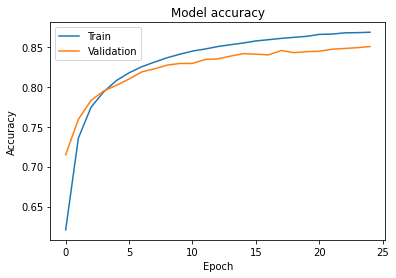

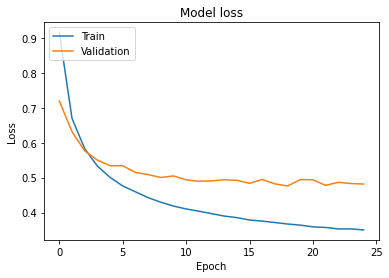

In [155]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [156]:
#testing results
print(cnnmodel2.metrics_names)
cnnmodel2.evaluate(X_test, to_categorical(Y_test))

['loss', 'acc', 'f1_m', 'precision_m', 'recall_m']
46818/46818 [==============================] - 3s 72us/step


[1.5403094606222523,
 0.6068606091674142,
 0.5986643916284714,
 0.616707061457305,
 0.5821906104489726]